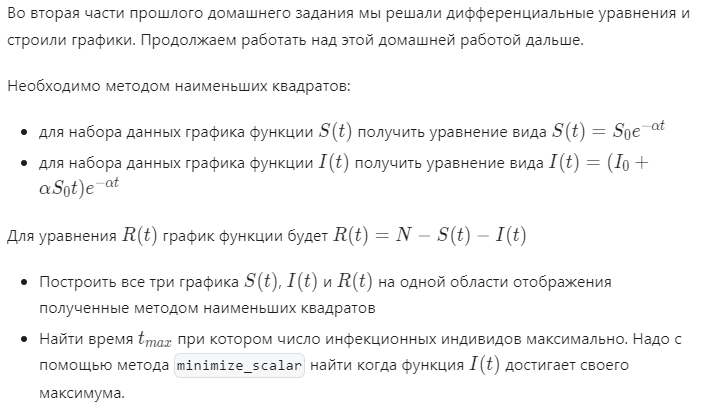

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [3]:
alpha = 0.5
N = 1000000
S = 990000
I = 7000
R = 3000
t0, tf = 0, 25

In [4]:
def st(t, alp):
    return S * np.exp(-alp * t)

def diff_st(alp, y, t):
    return y - st(t, alp)

def it(t, alp):
    return (I + alp * S * t) * np.exp(-alp * t)

def diff_it(alp,  y, t):
    return y - it(t, alp)

In [5]:
t = np.linspace(t0, tf, 100)
y1 = np.array(S * np.exp(-alpha * t))
y2 = np.array((I + alpha * S * t) * np.exp(-alpha * t))
y3 = np.array(N - y1 - y2)

In [6]:
apx, _ = optimize.leastsq(diff_st, (0.2, ), args=(y1, t))

In [7]:
apx1, _ = optimize.leastsq(diff_it, (0.2, ), args=(y2, t))

In [15]:
y1_apx = S * np.exp(-apx * t)

In [16]:
y2_apx = (I + alpha * S * t) * np.exp(-apx1 * t)

In [17]:
y3_rt = N - y1_apx - y2_apx

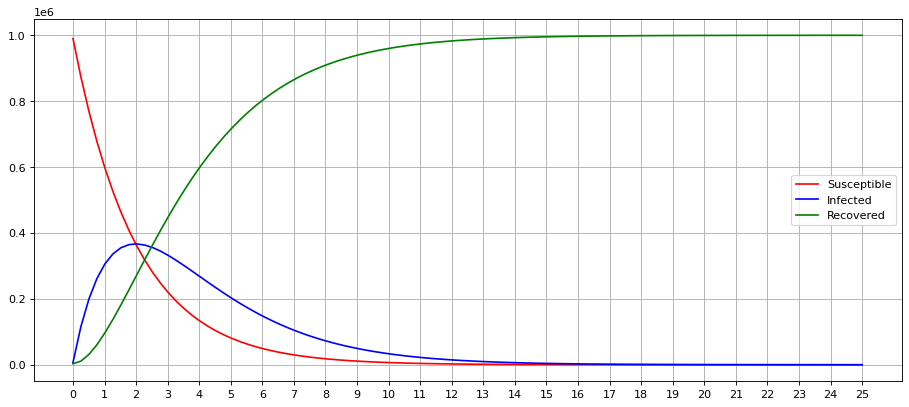

In [33]:
plt.figure(figsize = (14, 6), dpi = 80)
plt.grid()
plt.xticks(np.arange(0, 26, step=1))
plt.plot(t, y1_apx, color='red', label='Susceptible')
plt.plot(t, y2_apx, color='blue', label='Infected')
plt.plot( t, y3_rt, color='green', label='Recovered')
plt.legend()
plt.show()

In [21]:
result = optimize.minimize_scalar(lambda t, alp: -it(t, alp), bracket=(0, 10), args=(apx1, ) )
result

     fun: array([-366784.92843054])
    nfev: 18
     nit: 14
 success: True
       x: array([1.98585859])

In [38]:
print(f't(max): {float(result.x)}')

t(max): 1.9858585905460802
